# Realizando Operações Matemáticas com o Tensorflow

Tensores são as estruturas básicas de dados do TensorFlow. Como já dissemos, eles
representam as arestas de conexão em um gráfico de fluxo de dados. Um tensor simplesmente identifica um
matriz ou lista multidimensional

![title](img/tensores.jpg)

### Tensores Unidimensionais

Para construir um tensor unidimensional, usamos o comando Numpy array (s), onde s é um
Lista de Python:

In [1]:
import numpy as np
tensor_1d = np.array([1.3, 1, 4.0, 23.99])
tensor_1d

array([ 1.3 ,  1.  ,  4.  , 23.99])

In [2]:
tensor_1d[0]

1.3

In [3]:
tensor_1d.ndim

1

In [4]:
tensor_1d.shape

(4,)

In [5]:
tensor_1d.dtype

dtype('float64')

Para construir um tensor unidimensional, usamos o comando __numpy.array__, onde s é um
Lista de Python:

In [8]:
import tensorflow as tf
tf_tensor = tf.convert_to_tensor(tensor_1d,dtype=tf.float64)

with tf.Session() as sess:
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[2]))

[ 1.3   1.    4.   23.99]
1.3
4.0


Para criar um tensor ou matriz bidimensional, usamos novamente array (s), mas s será um
seqüência de array

In [9]:
tensor_2d=np.array([(1,2,3,4),(4,5,6,7),(8,9,10,11),(12,13,14,15)])
tensor_2d

array([[ 1,  2,  3,  4],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [10]:
tensor_2d[3][3]

15

### Manipulando Tensores

Para criar um tensor ou matriz bidimensional, usamos novamente array (s), mas s será um
seqüência de array

In [12]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype='int32')
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype='int32')

In [13]:
matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)

In [14]:
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1,matrix2)

In [16]:
matrix_3 = np.array([(2,7,2),(1,4,2),(9,0,2)],dtype='float32')
matrix_det = tf.matrix_determinant(matrix_3)

In [20]:
with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)

array([[6, 6, 6],
       [6, 6, 6],
       [6, 6, 6]], dtype=int32)

In [21]:
result1

array([[6, 6, 6],
       [6, 6, 6],
       [6, 6, 6]], dtype=int32)

In [18]:
result2

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]], dtype=int32)

In [22]:
result3

55.999992

In [23]:
tensor_3d = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
tensor_3d.shape

(2, 2, 2)

Vamos ver como podemos aplicar operações um pouco mais complexas a essas estruturas de dados.
Considere o seguinte código

![title](img/tensor_3_x_3.jpg)

O TensorFlow é projetado para lidar com tensores de todos os tamanhos e operadores que podem ser usados ​​para manipulá-los. Neste exemplo, para ver manipulações de array, vamos trabalhar com uma imagem digital. Como você provavelmente sabe, uma imagem digital colorida que é uma matriz de tamanho MxNx3 (um tensor de três ordens), cujos componentes correspondem aos componentes de vermelho, verde e azul na imagem (espaço RGB), significa que cada recurso na retangular A caixa para a imagem RGB será especificada por três coordenadas, i, j e k.

![title](img/imagem_rgb.jpg)

### Manipulando Tensores com o Tensorflow

In [27]:
import matplotlib.image as mp_image 
filename = "img/packet.jpg" 
input_image = mp_image.imread(filename)

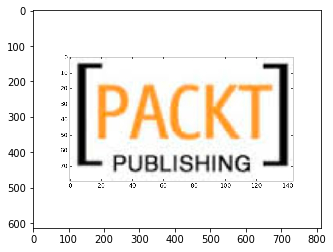

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(input_image) 
plt.show()

(16, 814, 3)


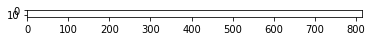

In [31]:
my_image = tf.placeholder("uint8",[None,None,3])
slice = tf.slice(my_image,[10,0,0],[16,-1,-1])
with tf.Session() as session: 
    result = session.run(slice,feed_dict={my_image: input_image}) 
    print(result.shape) 
 
plt.imshow(result) 
plt.show()

### Números complexos e fractais
Primeiro de tudo, vemos como o Python lida com números complexos. É uma questão simples. Por exemplo, definindo x = 5 + 4j em Python, devemos escrever o seguinte

In [1]:
x = 5.+4j
x

(5+4j)

Python usa j para significar √-1 em vez de i em matemática.
Se você colocar um número antes do j, o Python irá considerá-lo como um número imaginário, caso contrário, é uma variável. Isso significa que se você quiser escrever o número imaginário i, você deve escrever 1j ao invés de j.

In [2]:
x.real 

5.0

In [3]:
x.imag

4.0

### Fractais em Tensorflow

Como exibir os fractais com o TensorFlow. O conjunto de Mandelbrot é um dos fractais mais famosos. Um fractal é um objeto geométrico que se repete em sua estrutura em diferentes escalas. Fractais são muito comuns na natureza, e um exemplo é a costa da Grã-Bretanha.

O conjunto Mandelbrot é definido para os números complexos c para os quais a seguinte sucessão é verdadeira e limitada:

__Z(n+1) = Z(n)2 + c, onde  Z(0) = 0__

Z tem valor inicial igual a 0, Z (0) = 0.

Escolha o número complexo c como o ponto atual. No plano cartesiano, o eixo das abscissas (linha horizontal) representa a parte real, enquanto o eixo das ordenadas (linha vertical) representa a parte imaginária de c.

Iteração: Z (n + 1) = Z (n) 2 + c

Pare quando Z (n) 2 for maior que o raio máximo;

In [6]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005] 
Z = X+1j*Y 
c = tf.constant(Z.astype(np.complex64)) 

In [8]:
zs = tf.Variable(c) 
ns = tf.Variable(tf.zeros_like(c, tf.float32)) 

Em vez de instanciar uma sessão normal, instanciamos uma InteractiveSession ():

Requer, como veremos, os métodos __Tensor.eval()__ e __Operation.run()__. Então nós inicializamos todas as variáveis envolvidas através do método run ():

In [12]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()
zs_ = zs*zs + c
not_diverged = tf.abs(zs_) < 4
step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)))
for i in range(200): step.run()

/Users/ramonfsilva/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


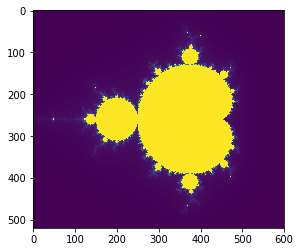

In [13]:
plt.imshow(ns.eval()) 
plt.show() 

# Calculando Gradientes
TensorFlow tem funções para resolver outras tarefas mais complexas. Por exemplo, usaremos um operador matemático que calcula a derivada de y em relação ao parâmetro expression x. Para este propósito, usamos a função tf.gradients ().

Vamos considerar a função matemática y = 2x². Queremos calcular o gradiente di y em relação a x = 1. A seguir está o código para calcular esse gradiente.


A variável __x__ é a variável independente da função:

In [19]:
x = tf.placeholder(tf.float32)

y =  2*x*x

var_grad = tf.gradients(y, x)

In [20]:
with tf.Session() as session:
    var_grad_val = session.run(var_grad,feed_dict={x:1}) 

In [22]:
var_grad_val

[4.0]

# Números aleatórios
A geração de números aleatórios é essencial no aprendizado de máquina e nos algoritmos de treinamento. Quando números aleatórios são gerados por um computador, eles são gerados por um gerador de números pseudo-aleatórios (PRNG). O termo pseudo vem do fato de que o computador é uma mancha logicamente programada executando instruções que só podem simular aleatoriedade. Apesar dessa limitação lógica, os computadores são muito eficientes na geração de números aleatórios. TensorFlow fornece operadores para criar tensores aleatórios com diferentes distribuições.

### Distribuição Uniforme
Geralmente, quando precisamos trabalhar com números aleatórios, tentamos obter valores repetidos com a mesma frequência, uniformemente distribuídos. O operador TensorFlow fornece valores entre minval e maxval, todos com a mesma probabilidade. Vamos ver um código de exemplo simples:

[0.93382776 0.52402973 0.7709402  0.26860535 0.3335235  0.06091821
 0.98703945 0.4330597  0.06485069 0.54607415 0.7635125  0.18120944
 0.915414   0.35799277 0.67332757 0.2840159  0.85911226 0.39116144
 0.8003427  0.9268006  0.1622454  0.4360336  0.6837237  0.4724245
 0.49162734 0.10308468 0.8812784  0.16529    0.48167717 0.83180356
 0.5852407  0.6138921  0.9113649  0.28669417 0.32426882 0.74954927
 0.70948243 0.18500996 0.77442825 0.09283638 0.3883648  0.05530894
 0.9580132  0.2267648  0.1192944  0.30492425 0.13955748 0.69972456
 0.66291964 0.7163255  0.4702257  0.70494425 0.94084334 0.7500645
 0.80144966 0.10628963 0.41181958 0.05972874 0.43039596 0.4433123
 0.52102625 0.24333847 0.8771125  0.6784617  0.473392   0.39717364
 0.8474407  0.771109   0.12523961 0.78071034 0.98047185 0.8935541
 0.99257815 0.08699679 0.04860187 0.33747733 0.5057819  0.06834579
 0.76176906 0.98756075 0.88647044 0.27456236 0.55879474 0.87315035
 0.5777178  0.712203   0.3594935  0.45394766 0.03008318 0.63136065

/Users/ramonfsilva/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


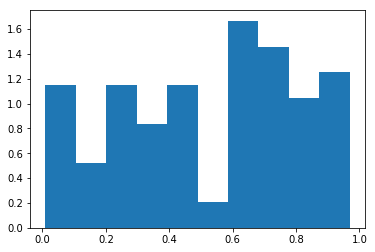

In [26]:
uniform = tf.random_uniform([100],minval=0,maxval=1,dtype=tf.float32) 
sess = tf.Session()

with tf.Session() as session: 
    print(uniform.eval())
    plt.hist(uniform.eval(),normed=True) 
    plt.show()

### Distribuição Normal
Em alguns casos específicos, você pode precisar gerar números aleatórios que diferem em algumas unidades. Neste caso, usamos a distribuição normal de números aleatórios, também chamada de distribuição gaussiana, que aumenta a probabilidade de extração dos próximos números a 0. Cada inteiro representa o desvio padrão. Como mostrado a partir dos futuros problemas para as margens do intervalo tem uma chance muito baixa de ser extraído. A seguir, a implementação com o TensorFlow:

/Users/ramonfsilva/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


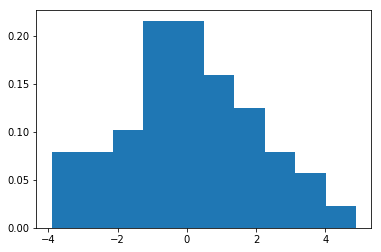

In [28]:
norm = tf.random_normal([100], mean=0, stddev=2) 
with tf.Session() as session: 
    plt.hist(norm.eval(),normed=True) 
    plt.show()

### Gerando números aleatórios com sementes
Lembramos que nossa sequência é pseudo-aleatória, porque os valores são calculados usando um algoritmo determinístico e a probabilidade não desempenha um papel real. A semente é apenas um ponto de partida para a sequência e, se você começar da mesma semente, terminará com a mesma sequência. Isso é muito útil, por exemplo, para depurar seu código, quando você está procurando por um erro em um programa e deve ser capaz de reproduzir o problema, porque cada execução seria diferente.

Considere o seguinte exemplo em que temos duas distribuições uniformes:

In [31]:
uniform_with_seed = tf.random_uniform([1], seed=1)
uniform_without_seed = tf.random_uniform([1])

print("First Run")

with tf.Session() as first_session:
    print("uniform with (seed = 1) = {}".format(first_session.run(uniform_with_seed)))
    print("uniform with (seed = 1) = {}".format(first_session.run(uniform_with_seed)))
    print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))
    print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))

print("Second Run")
with tf.Session() as second_session:
    print("uniform with (seed = 1) = {}".format(second_session.run(uniform_with_seed)))
    print("uniform with (seed = 1) = {}".format(second_session.run(uniform_with_seed)))
    print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))
    print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))

First Run
uniform with (seed = 1) = [0.2390374]
uniform with (seed = 1) = [0.22267115]
uniform without seed = [0.7718884]
uniform without seed = [0.95966625]
Second Run
uniform with (seed = 1) = [0.2390374]
uniform with (seed = 1) = [0.22267115]
uniform without seed = [0.5915518]
uniform without seed = [0.59265137]


### Método de Montecarlo
Terminamos a seção sobre números aleatórios com uma simples nota sobre o método de Montecarlo. É um método probabilístico numérico amplamente utilizado na aplicação de computação científica de alto desempenho. Em nosso exemplo, calcularemos o valor de π:

In [32]:
trials = 100 
hits = 0


In [33]:
x = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32) 
y = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32) 
pi = []

In [34]:
sess = tf.Session()

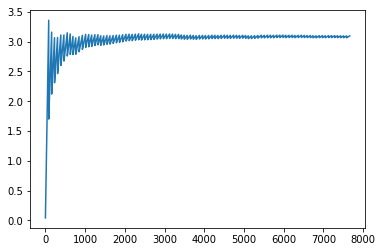

In [35]:
with sess.as_default(): 
    for i in range(1,trials): 
        for j in range(1,trials): 
            if x.eval()**2 + y.eval()**2 < 1 : 
                hits = hits + 1 
                pi.append((4 * float(hits) / i)/trials)   
 
plt.plot(pi) 
plt.show()